In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.utils.random import sample_without_replacement


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, Y_train, Y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train,X_test

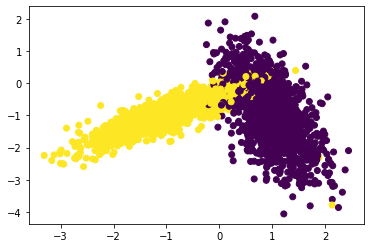

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=Y_test)
plt.show()

# Implementing Custom RandomSearchCV

<pre>
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model
    
    
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    #2.devide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
      group 1: 0-33, group 2:34-66, group 3: 67-100
    #3.for each hyperparameter that we generated in step 1:
        # and using the above groups we have created in step 2 you will do cross-validation as follows
        
        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and
          test accuracies
          
        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
          train and test accuracies
          
        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
          test accuracies
        # based on the 'folds' value we will do the same procedure
        
        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"
    #4. return both "train_scores" and "test_scores"

#5. call function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values into "train_score", and "cv_scores"
#6. plot hyper-parameter vs accuracy plot as shown in reference notebook and choose the best hyperparameter
#7. plot the decision boundaries for the model initialized with the best hyperparameter, as shown in the last cell of reference notebook

</pre>

In [3]:
def RandomSearchCV(X_train,Y_train,classifier, param_range, folds):
    #params = np.random.randint(param_range[0], param_range[1], size = 10)#generating 10 random numbers and storing them as params
    params = sample_without_replacement(param_range[1], n_samples = 10)
    params.sort()
    trainscores = []
    testscores = []
    for param in tqdm(params):
        trainscores_folds = []
        testscores_folds = []
        for i in range(0,folds):
            bucket_size = int(len(X_train)/folds)
            test_index_list = list(set(list(range((bucket_size*i),(bucket_size*(i+1))))))#dividing the dataset into test
            train_index_list = list(set(list(range(0,len(X_train))))-set(test_index_list))#dividing the dataset into train
     
    # selecting the data points based on the train_indices and test_indices
            x_train = X_train[train_index_list]
            y_train = Y_train[train_index_list]
            x_test  = X_train[test_index_list]
            y_test  = Y_train[test_index_list]
            classifier.n_neighbors = param
            classifier.fit(x_train,y_train) #fit function
            y_predicted = classifier.predict(x_test)
            testscores_folds.append(accuracy_score(y_test, y_predicted))
            y_predicted = classifier.predict(x_train)
            trainscores_folds.append(accuracy_score(y_train, y_predicted))
        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
    return trainscores,testscores,params

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
classifier = KNeighborsClassifier()
folds = 3 #Number of folds in k fold cross validation

trainscores_op, testscores_op, params_op = RandomSearchCV(X_train, Y_train, classifier, (1,50), folds)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:25<00:00,  2.54s/it]


In [5]:
print("Params: ", params_op, "\nTrain scores: ", trainscores_op, "\nTest scores: ", testscores_op)                      

Params:  [ 9 11 16 17 21 23 31 36 37 47] 
Train scores:  [0.9608666666666666, 0.9596666666666667, 0.9579333333333334, 0.9575333333333335, 0.9572666666666666, 0.9571999999999999, 0.9574666666666666, 0.9580666666666667, 0.9579333333333334, 0.9582] 
Test scores:  [0.9529333333333333, 0.9540000000000001, 0.9548, 0.9545333333333333, 0.9541333333333334, 0.9533333333333333, 0.9553333333333334, 0.9556, 0.9556, 0.9562666666666667]


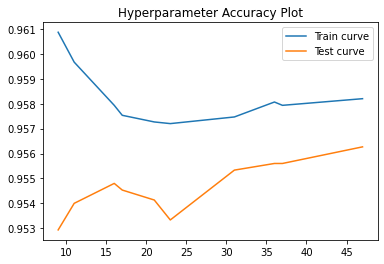

In [6]:
plt.plot(params_op, trainscores_op, label = "Train curve")
plt.plot(params_op, testscores_op, label = "Test curve")
plt.title("Hyperparameter Accuracy Plot")
plt.legend()
plt.show()

In [7]:
def decision_boundary(x1, x2, y, classifier):
    colormap_light = ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"])
    colormap_dark = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])
    
    x_min, x_max = x1.min()-1, x1.max()+1
    y_min, y_max = x2.min()-1, x2.max()+1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),np.arange(y_min, y_max, 0.02))
    z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, z, cmap = colormap_light)
    plt.scatter(x1, x2, c=y, cmap = colormap_dark)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2 Class Classification (k=%i)" % (classifier.n_neighbors))
    plt.show()
    

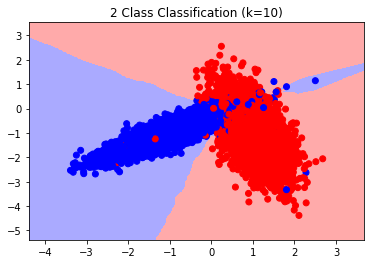

In [8]:
from matplotlib.colors import ListedColormap
classifier = KNeighborsClassifier(n_neighbors = 10)
classifier.fit(X_train, Y_train)
decision_boundary(X_train[:,0], X_train[:,1], Y_train, classifier)

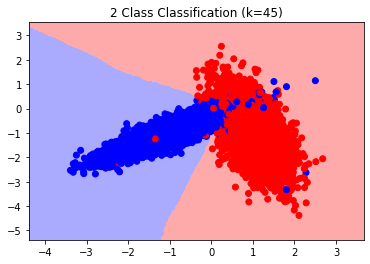

In [9]:
from matplotlib.colors import ListedColormap
classifier = KNeighborsClassifier(n_neighbors = 45) #taking k=45 for best results from the above plot
classifier.fit(X_train, Y_train)
decision_boundary(X_train[:,0], X_train[:,1], Y_train, classifier)